## setting the whole shabang

In [ ]:
%pip install pyodbc python-dotenv pandas tiktoken matplotlib

In [51]:
# import dependencies
import csv
from dotenv import load_dotenv
import os
import pandas as pd
import pyodbc
import tiktoken

In [52]:
# loading env
load_dotenv()

True

## creating a data frame from the database

In [53]:
# get the list of all Gandalf posts from the MSSQL db
user = os.environ["DB_USER"]
password = os.getenv("DB_PASSWORD")
server = os.getenv("DB_SERVER")
database = os.getenv("DB_NAME")

# ! you may need to change that if you're not using the ODBC Driver 17 for SQL Server
conn = pyodbc.connect(f"Driver={{ODBC Driver 17 for SQL Server}};Server={server};Database={database};UID={user};PWD={password}")
cursor = conn.cursor()
cursor.execute("SELECT name, url, description FROM posts")
rows = cursor.fetchall()

posts = []

for row in rows:
    posts.append({
        "name": row[0],
        "url": row[1],
        "description": row[2]
    })

# Create a dataframe from the rows
df = pd.DataFrame(posts, columns=["name", "url", "description"])

conn.close()

# export the dataframe to a csv file
df.to_csv('gandalf_posts.csv')
# df.head()

## counting DB tokens

<Axes: >

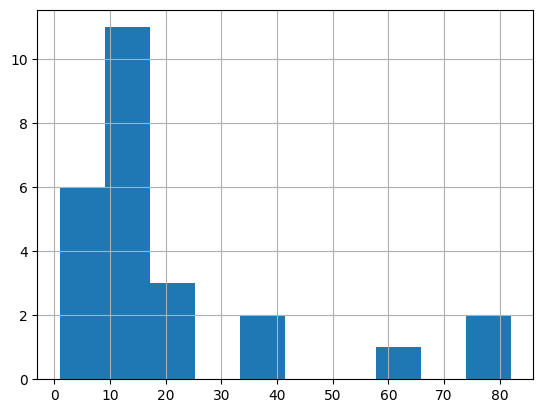

In [54]:
# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

# TODO do the same thing with the tokens coming from the blog posts themselves
df = pd.read_csv('gandalf_posts.csv', index_col=0)
df.columns = ["name", "url", "description"]

# Tokenize the text and save the number of tokens to a new column
df['n_decription_tokens'] = df.description.apply(lambda x: len(tokenizer.encode(x)))
# Visualize the distribution of the number of tokens per row using a histogram
df.n_decription_tokens.hist()